In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans 
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv("GENERAL.csv")
# Fill the missing values
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(),inplace = True)
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(),inplace = True)

df['CUST_ID'] = df['CUST_ID'].str.replace('C', '')

In [3]:
model=AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
clust_labels=model.fit_predict(df)  

agglomerative=pd.DataFrame(clust_labels)
agglomerative.tail()

,0
8945,2
8946,2
8947,2
8948,2
8949,2


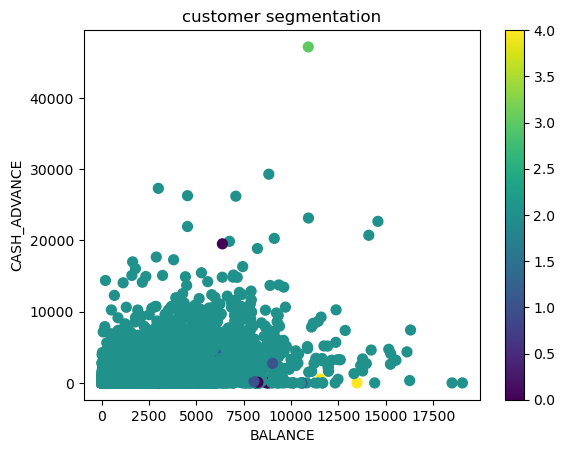

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df['BALANCE'] , df["CASH_ADVANCE"] , c= agglomerative[0], s=50)
ax.set_title("customer segmentation")
ax.set_xlabel("BALANCE")
ax.set_ylabel("CASH_ADVANCE")
plt.colorbar(scatter)

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75]],
 'dcoord': [[0.0, 4764.0042601416435, 4764.0042601416435, 0.0],
  [0.0, 9364.545907940941, 9364.545907940941, 4764.0042601416435],
  [0.0, 27685.498432477176, 27685.498432477176, 9364.545907940941],
  [0.0, 34000.13450966632, 34000.13450966632, 27685.498432477176]],
 'ivl': ['4', '3', '2', '0', '1'],
 'leaves': [4, 3, 2, 0, 1],
 'color_list': ['C1', 'C1', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C1', 'C1', 'C1']}

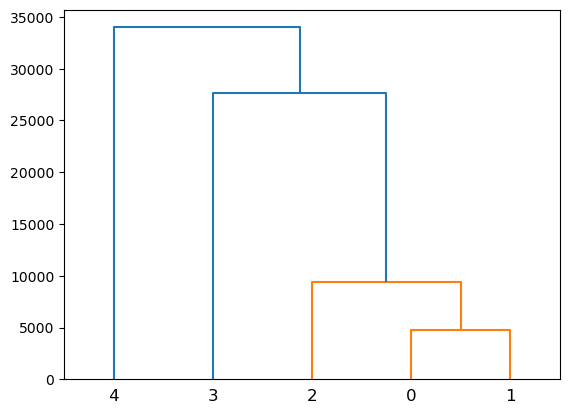

In [6]:
k_means = KMeans(n_clusters=5, random_state=0)  
k_means.fit(df)
den = linkage(k_means.cluster_centers_, 'ward')
# Plot the dendrogram
dendrogram(den)

In [9]:
Sum = []
k = range(1,20)
for k in k :
    km = KMeans(n_clusters = k)
    km = km.fit(df)
    Sum.append(km.inertia_)

ValueError: x and y must have same first dimension, but have shapes (1,) and (19,)

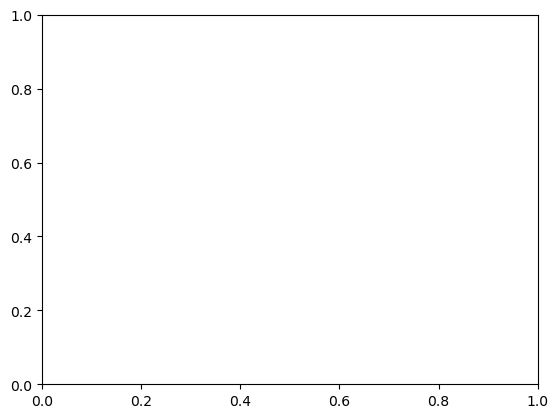

In [10]:
plt.plot(k,Sum,"bx")
plt.xlabel('k')
plt.ylabel('Sum')
plt.title("Elbow method")
plt.show()